# Pandas

In [1]:
import pandas as pd
import numpy as np
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

import sys
print ("Python version:", sys.version)

Pandas version: 0.20.1
Numpy version: 1.12.1
Python version: 3.6.1 |Anaconda 4.4.0 (x86_64)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


### Pandas Series objects

In [2]:
data = pd.Series([5, 10, 15, 20, 25])
data

0     5
1    10
2    15
3    20
4    25
dtype: int64

In [3]:
# to access the values of pandas series
data.values

array([ 5, 10, 15, 20, 25])

In [4]:
# access the index of pandas series
data.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
# access data via associated index
print(data[1])
print('--------')
print(data[3:5])

10
--------
3    20
4    25
dtype: int64


In [6]:
#index need not be an integer
dt = pd.Series([1, 2, 3, 4, 5],
              index=['a', 'b', 'c', 'd', 'e'])
dt

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [7]:
# access the data as expected 
dt['c']

3

In [8]:
# Series as specialized dictionary
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [9]:
population['California']

38332521

In [10]:
# unlike dictionary, Series support slicing
population['California' : 'Illinous']

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

#### Constracting Series objects (pd.Series(data, index=index))

In [11]:
# 1- from a list or numpy array
pd.Series([1, 2, 4])

0    1
1    2
2    4
dtype: int64

In [12]:
# 2a- from a dictionary
pd.Series({1:'a', 5:'c' , 2:'g'}, index=[1,5,2])

1    a
5    c
2    g
dtype: object

In [13]:
# 2b- from a dictionary
pd.Series({'a': 1, 'c':5, 'b':67}, index=['a','b','c'])

a     1
b    67
c     5
dtype: int64

### Pandas DataFrame object

In [14]:
# lets create another pandas series object first
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
dtype: int64

In [15]:
# use dictionary to create a DataFrame from population and area Series objects
states = pd.DataFrame({'population': population , 'area':area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [16]:
# access the index
states.index

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [17]:
# access column names
states.columns

Index(['area', 'population'], dtype='object')

In [18]:
# access values
states.values

array([[  423967, 38332521],
       [  170312, 19552860],
       [  149995, 12882135],
       [  141297, 19651127],
       [  695662, 26448193]])

In [19]:
# access a column
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

#### Constracting DataFrame objects

In [20]:
# 1- from a Series object
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


In [21]:
# 2- from a list of dictionary
data = [{'a': 1, 'b':2}
       for i in range(3)]
pd.DataFrame(data)

,a,b
0,1,2
1,1,2
2,1,2


In [22]:
# 3- from a dictionary of Series object
pd.DataFrame({'population':population , 'area':area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [23]:
# 4- from 2d Numpy array
pd.DataFrame(np.random.rand(3,2),
            columns=['aaa', 'bbb'],
            index=['a','b','c'])

,aaa,bbb
a,0.417933,0.634213
b,0.742840,0.110415
c,0.476192,0.821592


### Pandas Index object

In [24]:
ind = pd.Index([1,2,5,16])
ind

Int64Index([1, 2, 5, 16], dtype='int64')

In [25]:
# access index values
ind[3]

16

In [26]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

4 (4,) 1 int64


In [27]:
# indexes are immutable. code below would throw an error message
#ind[3] = 0

## Data Indexing and Selection

In [28]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [29]:
data['b']

0.5

In [30]:
'a' in data

True

In [31]:
1.0 in data

False

In [32]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [33]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [34]:
# assign a new index and an index value
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [35]:
# slicing explicitly
data['b':'e']

b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [36]:
# slicing implicitly
data[0:2]

a    0.25
b    0.50
dtype: float64

In [37]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [38]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [39]:
data.loc['a']

0.25

In [40]:
data.loc[['a', 'c']]

a    0.25
c    0.75
dtype: float64

In [41]:
data.loc['a':'d']

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [42]:
data.iloc[1]

0.5

In [43]:
data.iloc[1:3]

b    0.50
c    0.75
dtype: float64

### Data Selection in DataFrames

In [44]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'population':pop})
data

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [45]:
# access the individual Series that make up the column
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [46]:
# equivalent code
data.area

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [47]:
data.area is data['area']

True

In [48]:
data.area == data['area']

California    True
Florida       True
Illinois      True
New York      True
Texas         True
Name: area, dtype: bool

In [49]:
data['density'] = data['population'] / data['area']
data

,area,population,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [50]:
data.values

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64481930e+07,   3.80187404e+01]])

In [51]:
# 2D DataFrame
data.T

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
population,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [52]:
data.values[0]

array([  4.23967000e+05,   3.83325210e+07,   9.04139261e+01])

In [53]:
data.values[1]

array([  1.70312000e+05,   1.95528600e+07,   1.14806121e+02])

In [54]:
data['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [55]:
data

,area,population,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [56]:
# iloc
data.iloc[1]

area          1.703120e+05
population    1.955286e+07
density       1.148061e+02
Name: Florida, dtype: float64

In [57]:
data.iloc[1:3]

,area,population,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [58]:
data.iloc[1:3, 0:2]

,area,population
Florida,170312,19552860
Illinois,149995,12882135


In [59]:
data.loc['Florida']

area          1.703120e+05
population    1.955286e+07
density       1.148061e+02
Name: Florida, dtype: float64

In [60]:
data.loc[['Florida', 'Illinois']]

,area,population,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [61]:
data.loc[['Florida','Illinois']][['area']]

,area
Florida,170312
Illinois,149995


In [62]:
data.loc['Florida':'Illinois', :'population']

,area,population
Florida,170312,19552860
Illinois,149995,12882135


In [63]:
# ix indexer is hybrid of loc and iloc
data.ix[1:3 , :'population']

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,area,population
Florida,170312,19552860
Illinois,149995,12882135


In [64]:
data.ix[1:3 , ['area', 'population']]

,area,population
Florida,170312,19552860
Illinois,149995,12882135


In [65]:
# use masking and fancy indexing with loc
data.loc[data['density'] > 100 , ['area', 'density']]

,area,density
Florida,170312,114.806121
New York,141297,139.076746


### Operating on DataFrames

In [66]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [67]:
df = pd.DataFrame(rng.randint(0, 10, (3,4)),
                  columns=['A','B','C','D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [68]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [69]:
def expo(x):
    y = np.e ** x
    return y

In [70]:
expo(6)

403.428793492735

In [71]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


In [72]:
# index alignment
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Alaska':1723337})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, })

In [73]:
pop / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [74]:
# any missing values are filled in with NaN by default in Python
A = pd.Series([2, 4, 6], index=[0,1,2])
B = pd.Series([1, 3, 5], index=[1,2,3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [75]:
# use fill_value 
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

In [76]:
# index aligment in DataFrames
A = pd.DataFrame(rng.randint(0, 20, (2,2)),
                columns=list('AB'))
B = pd.DataFrame(rng.randint(0, 10, (3,3)),
                columns=list('BAC'))
A

,A,B
0,1,11
1,5,1


In [77]:
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [78]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [79]:
# fill the missing values with the mean of all values in A 
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### Hierarhical Indexing

In [80]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]

In [81]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [82]:
pop = pop.reindex(index)
pop

California  2000   NaN
            2010   NaN
New York    2000   NaN
            2010   NaN
Texas       2000   NaN
            2010   NaN
dtype: float64

In [83]:
# all data for which the second index is 2010
pop[:,2010]

California   NaN
New York     NaN
Texas        NaN
dtype: float64

In [84]:
pop.loc['California']

2000   NaN
2010   NaN
dtype: float64

In [85]:
pop.ix['California', 2010]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


nan

In [86]:
pop.unstack()

,2000,2010
California,NaN,NaN
New York,NaN,NaN
Texas,NaN,NaN


In [87]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000    NaN  9267089
           2010    NaN  9284094
New York   2000    NaN  4687374
           2010    NaN  4318033
Texas      2000    NaN  5906301
           2010    NaN  6879014

### indexing and slicing a MultiIndex

In [88]:
pop_df[pop_df['under18'] > 6000000]

total  under18
California 2000    NaN  9267089
           2010    NaN  9284094
Texas      2010    NaN  6879014

In [89]:
pop.unstack().reset_index()

,index,2000,2010
0,California,NaN,NaN
1,New York,NaN,NaN
2,Texas,NaN,NaN


### merge and join

In [90]:
pop = pd.read_csv('data/state-population.csv')
areas = pd.read_csv('data/state-areas.csv')
abbrevs = pd.read_csv('data/state-abbrevs.csv')

In [91]:
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [92]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


In [93]:
merged = merged.drop('abbreviation', 1)

In [94]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [95]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [96]:
# number of nulls
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state           96
dtype: int64

In [97]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [98]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [99]:
merged.loc[merged['state/region']=='PR', 'state'] = 'Puerto Rico'

In [100]:
merged.loc[merged['state/region']=='USA', 'state'] = 'United States'

In [101]:
merged.isnull().sum()

state/region     0
ages             0
year             0
population      20
state            0
dtype: int64

In [102]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [103]:
final.isnull().sum()

state/region      0
ages              0
year              0
population       20
state             0
area (sq. mi)    48
dtype: int64

In [104]:
final.dropna(inplace=True)

In [105]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [106]:
data2010 = final.query("year==2010 & ages == 'total'" )
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [107]:
df = pd.DataFrame({'A' : np.random.randint(0, 10, size=4),
                   'B' : np.random.randint(0, 10, size=4)})
df

,A,B
0,7,0
1,7,1
2,2,4
3,2,7


In [108]:
df['A'].sum()

18

In [109]:
df['B'].mean()

3.0

In [110]:
df.mean(axis='rows')

A    4.5
B    3.0
dtype: float64

In [111]:
# product of all items
df.prod()

A    196
B      0
dtype: int64

In [112]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [113]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [114]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [115]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [116]:
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                   'data':range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [117]:
df.groupby('key')

In [118]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [119]:
df.groupby('key')['data'].median()

key
A    1.5
B    2.5
C    3.5
Name: data, dtype: float64

In [120]:
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [121]:
df.groupby('key').aggregate([sum, max, np.median])

data           
     sum max median
key                
A      3   3    1.5
B      5   4    2.5
C      7   5    3.5

In [122]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [123]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [124]:
len(pd.unique(planets.method))

10

In [125]:
pd.unique(planets.method).shape

(10,)

In [126]:
planets.groupby('method').sum()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,1.262360e+03,NaN,35.75,4023
Eclipse Timing Variations,15,4.276480e+04,10.25000,1261.44,18090
Imaging,50,1.418973e+06,NaN,2166.91,76347
Microlensing,27,2.207500e+04,NaN,41440.00,46225
Orbital Brightness Modulation,5,2.127920e+00,NaN,2360.00,6035
Pulsar Timing,11,3.671511e+04,NaN,1200.00,9992
Pulsation Timing Variations,1,1.170000e+03,NaN,NaN,2007
Radial Velocity,952,4.553151e+05,1341.65638,27348.11,1110158
Transit,776,8.377523e+03,1.47000,134242.77,798461


In [127]:
planets.groupby('method')[['year', 'mass']].sum()

,year,mass
method,,
Astrometry,4023,NaN
Eclipse Timing Variations,18090,10.25000
Imaging,76347,NaN
Microlensing,46225,NaN
Orbital Brightness Modulation,6035,NaN
Pulsar Timing,9992,NaN
Pulsation Timing Variations,2007,NaN
Radial Velocity,1110158,1341.65638
Transit,798461,1.47000


In [128]:
planets.groupby('method').aggregate([sum, np.mean])

number           orbital_period                 \
                                 sum      mean            sum           mean   
method                                                                         
Astrometry                         2  1.000000   1.262360e+03     631.180000   
Eclipse Timing Variations         15  1.666667   4.276480e+04    4751.644444   
Imaging                           50  1.315789   1.418973e+06  118247.737500   
Microlensing                      27  1.173913   2.207500e+04    3153.571429   
Orbital Brightness Modulation      5  1.666667   2.127920e+00       0.709307   
Pulsar Timing                     11  2.200000   3.671511e+04    7343.021201   
Pulsation Timing Variations        1  1.000000   1.170000e+03    1170.000000   
Radial Velocity                  952  1.721519   4.553151e+05     823.354680   
Transit                          776  1.954660   8.377523e+03      21.102073   
Transit Timing Variations          9  2.250000   2.393505e+02      79.783500   

                                     mass             distance               \
                                      sum      mean        sum         mean   
method                                                                        
Astrometry                            NaN       NaN      35.75    17.875000   
Eclipse Timing Variations        10.25000  5.125000    1261.44   315.360000   
Imaging                               NaN       NaN    2166.91    67.715937   
Microlensing                          NaN       NaN   41440.00  4144.000000   
Orbital Brightness Modulation         NaN       NaN    2360.00  1180.000000   
Pulsar Timing                         NaN       NaN    1200.00  1200.000000   
Pulsation Timing Variations           NaN       NaN        NaN          NaN   
Radial Velocity                1341.65638  2.630699   27348.11    51.600208   
Transit                           1.47000  1.470000  134242.77   599.298080   
Transit Timing Variations             NaN       NaN    3313.00  1104.333333   

                                  year               
                                   sum         mean  
method                                               
Astrometry                        4023  2011.500000  
Eclipse Timing Variations        18090  2010.000000  
Imaging                          76347  2009.131579  
Microlensing                     46225  2009.782609  
Orbital Brightness Modulation     6035  2011.666667  
Pulsar Timing                     9992  1998.400000  
Pulsation Timing Variations       2007  2007.000000  
Radial Velocity                1110158  2007.518987  
Transit                         798461  2011.236776  
Transit Timing Variations         8050  2012.500000

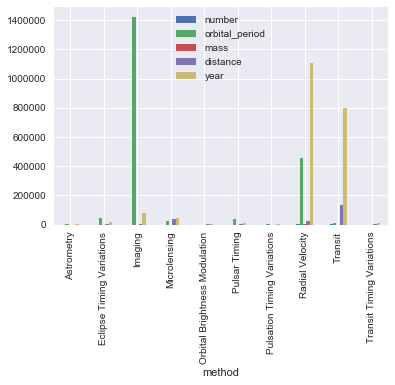

In [129]:
%matplotlib inline
planets.groupby('method').sum().plot(kind='bar')

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
planets.groupby('year').sum()['number']

year
1989      1
1992      6
1994      3
1995      1
1996     15
1997      1
1998     11
1999     24
2000     27
2001     15
2002     46
2003     35
2004     41
2005     64
2006     43
2007     65
2008    120
2009    131
2010    193
2011    354
2012    258
2013    277
2014    117
Name: number, dtype: int64

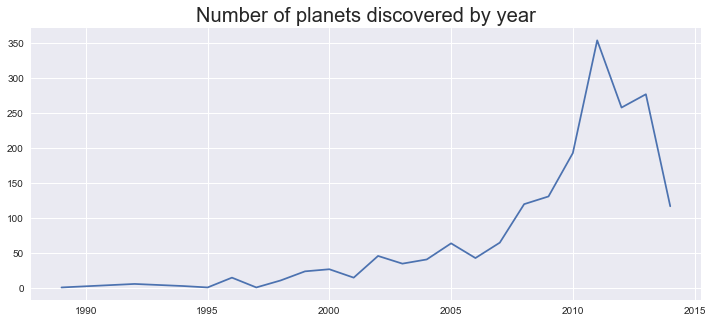

In [132]:
plt.figure(figsize=(12, 5))
plt.plot(planets.groupby('year').sum()['number'])
plt.style.use('fivethirtyeight')
plt.title('Number of planets discovered by year')

In [133]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


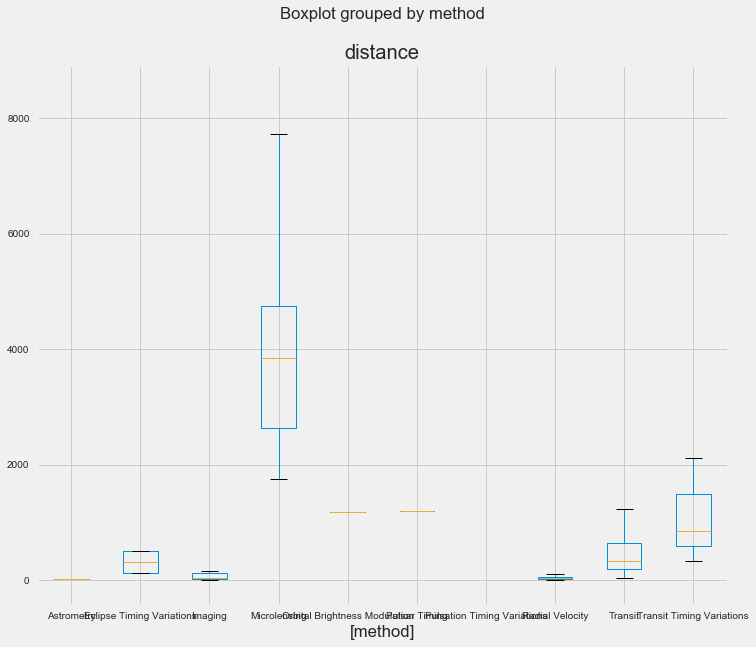

In [134]:
planets.boxplot(column=['distance'],
                figsize=(12, 10),
                by=['method'])

In [135]:
planets[['distance', 'year']].head()

,distance,year
0,77.40,2006
1,56.95,2008
2,19.84,2011
3,110.62,2007
4,119.47,2009


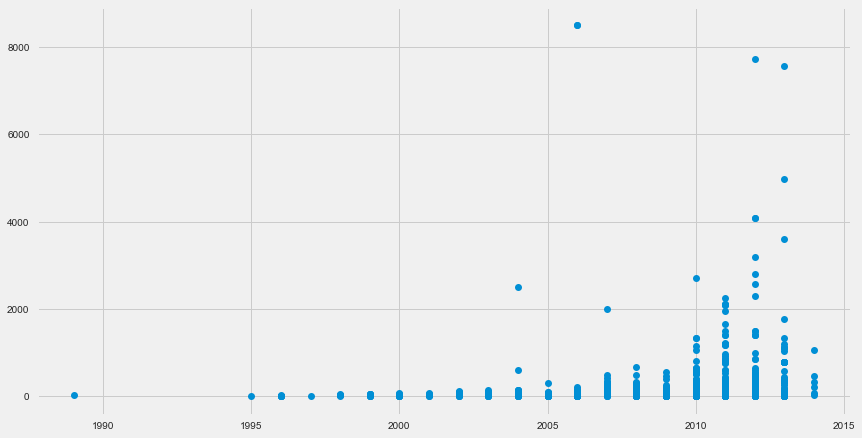

In [136]:
plt.figure(figsize=(13, 7))
plt.plot(planets.year, planets.distance, 'o');

In [137]:
import seaborn as sns

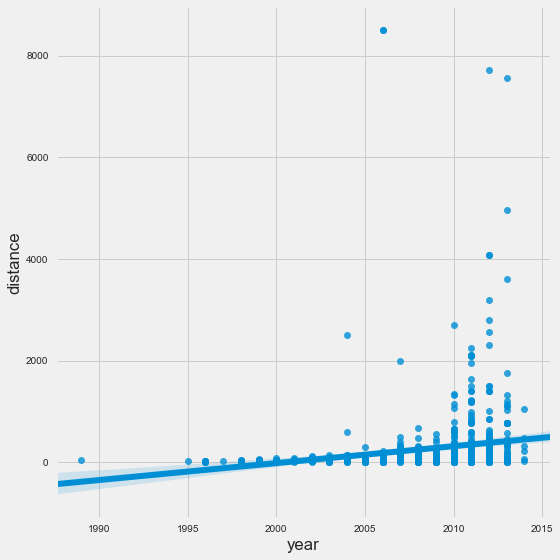

In [138]:
# regression
sns.lmplot(x='year', y='distance', data=planets, size=8);

Grouping example

In [139]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'

In [140]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### Pivot Table

In [141]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [142]:
titanic.shape

(891, 15)

In [143]:
# number of missing data for each column
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [144]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [145]:
titanic.groupby(['sex', 'class'])[['survived']].aggregate('mean').unstack()

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [146]:
# pivot table
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [147]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [148]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308  

In [149]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


----

In [150]:
births = pd.read_csv('data//births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [151]:
births['decade'] =  10 * (births['year'] // 10)
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


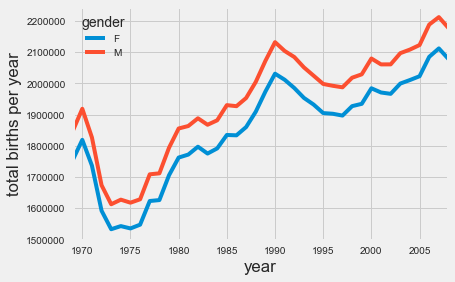

In [152]:
births.pivot_table('births', index='year',columns='gender', aggfunc='sum' ).plot()
plt.ylabel('total births per year');

In [153]:
# sigma clipping  to remove outliars
quartiles = np.percentile(births['births'], [25,50,75])
quartiles

array([ 4358. ,  4814. ,  5289.5])

In [154]:
mu = quartiles[1]
mu

4814.0

In [155]:
sig = 0.74 * (quartiles[2] - quartiles[0])
sig

689.30999999999995

In [156]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [157]:
# set day column to integer
births['day'] = births['day'].astype(int)

In [158]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null int64
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: int64(5), object(1)
memory usage: 799.0+ KB


In [159]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, 
                             format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


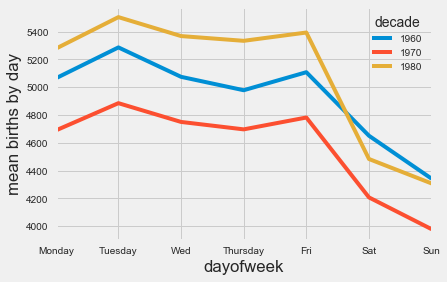

In [160]:
births.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wed', 'Thursday', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [161]:
births_by_day = births.pivot_table('births', [births.index.month, births.index.day])
births_by_day.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [162]:
births_by_day.index = [pd.datetime(2012, month, day) for (month, day) in births_by_day.index]

In [163]:
births_by_day.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


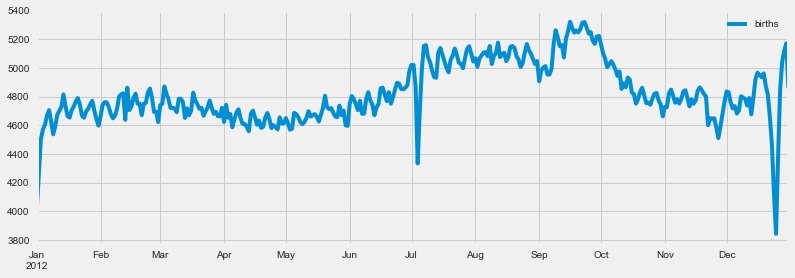

In [164]:
fig, ax = plt.subplots(figsize = (12, 4))
births_by_day.plot(ax =ax);

## Time Series

In [165]:
date = np.array('2015-04-03', dtype=np.datetime64)
date

array(datetime.date(2015, 4, 3), dtype='datetime64[D]')

In [166]:
date + 2

numpy.datetime64('2015-04-05')

In [167]:
date + np.arange(10)

array(['2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
       '2015-04-07', '2015-04-08', '2015-04-09', '2015-04-10',
       '2015-04-11', '2015-04-12'], dtype='datetime64[D]')

In [168]:
date2 = pd.to_datetime('3th of Feb, 1895')
date2.strftime('%A')

'Sunday'

In [169]:
date = date + np.arange(5)
index = pd.DatetimeIndex(date)
index

DatetimeIndex(['2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
               '2015-04-07'],
              dtype='datetime64[ns]', freq=None)

In [170]:
data = pd.Series([0,1,2,3,4], index = index)
data

2015-04-03    0
2015-04-04    1
2015-04-05    2
2015-04-06    3
2015-04-07    4
dtype: int64

In [171]:
data.loc['2015-04-06']

3

In [172]:
data.loc['2015-04-06'] - data.loc['2015-04-04']

2

In [173]:
#!pip install pandas_Datareader

In [174]:
from pandas_datareader import data

In [175]:
goog = data.DataReader('GOOG', start='2014', end='2016', data_source='google')
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,557.17,558.32,553.58,556.00,NaN
2014-01-03,556.94,557.91,551.91,551.95,NaN
2014-01-06,555.95,558.87,552.67,558.10,NaN
2014-01-07,561.94,569.28,560.02,568.86,NaN
2014-01-08,572.43,573.09,566.08,570.04,NaN


In [176]:
goog = goog['Close']

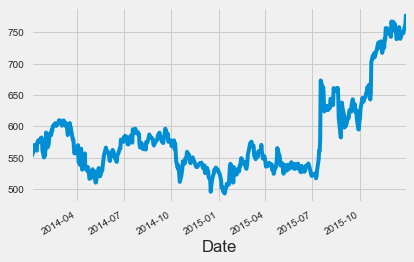

In [177]:
goog.plot();

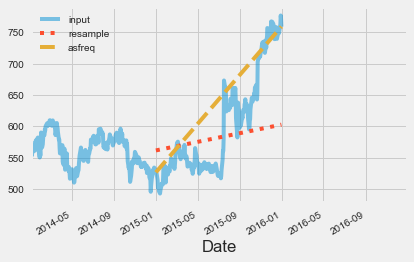

In [178]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample','asfreq'], loc='upper left');

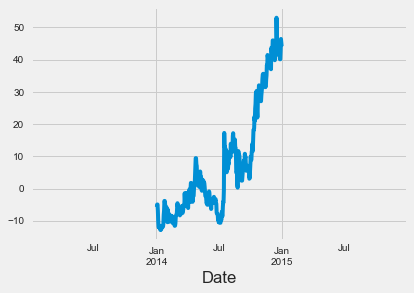

In [179]:
goog = goog.asfreq('D', method='pad')
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot();

### Seattle Bicycle Counts

In [180]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
from urllib.request import urlretrieve
urlretrieve(URL, 'FremontBridge.csv')

('FremontBridge.csv', <http.client.HTTPMessage at 0x1218068d0>)

In [181]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [182]:
# rename columns
data.columns = ['West', 'East']

In [183]:
data['Total'] = data.eval('West + East')

In [184]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [185]:
# summary stats
data.dropna().describe()

,West,East,Total
count,40841.000000,40841.00000,40841.000000
mean,55.043706,53.48777,108.531476
std,74.173400,77.24312,137.372419
min,0.000000,0.00000,0.000000
25%,7.000000,7.00000,15.000000
50%,29.000000,27.00000,59.000000
75%,72.000000,66.00000,142.000000
max,913.000000,717.00000,1302.000000


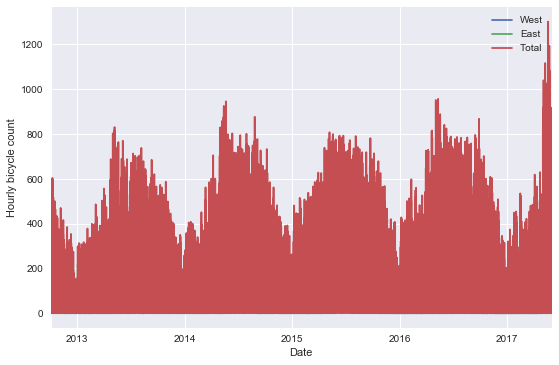

In [186]:
import seaborn; seaborn.set()
data.plot()
plt.ylabel('Hourly bicycle count');

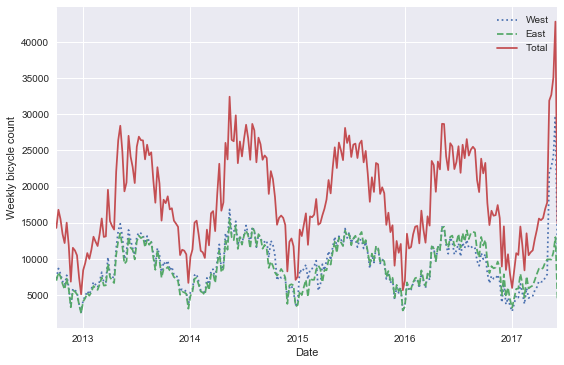

In [187]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

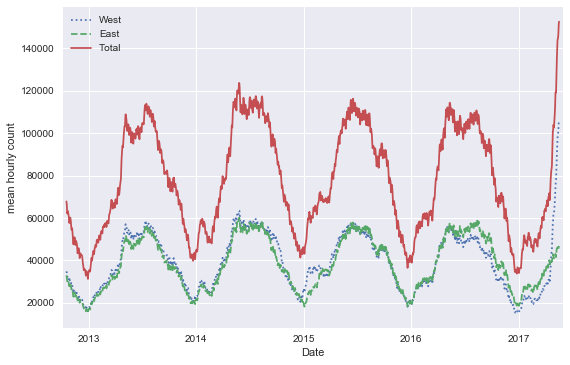

In [188]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

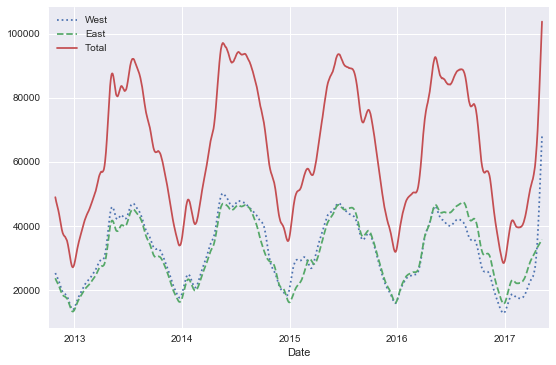

In [189]:
daily.rolling(50, center=True,
             win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

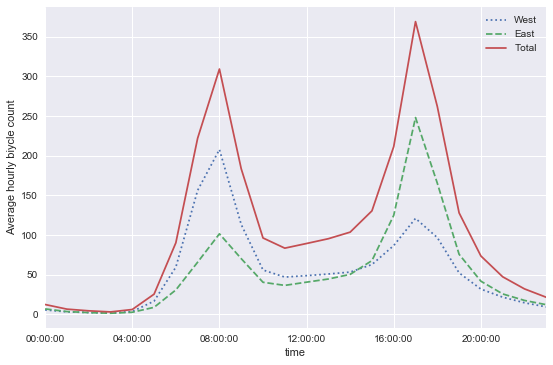

In [190]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks = hourly_ticks, style=[':', '--', '-'])
plt.ylabel('Average hourly biycle count');

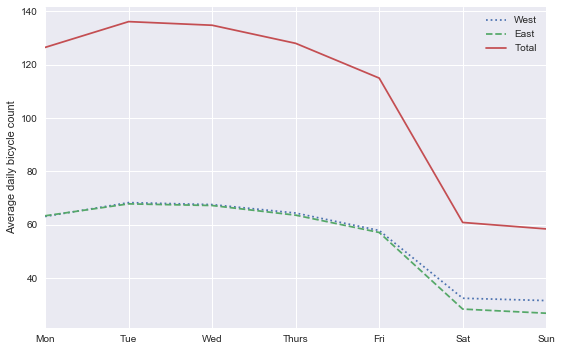

In [191]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])
plt.ylabel('Average daily bicycle count');

In [192]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [193]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

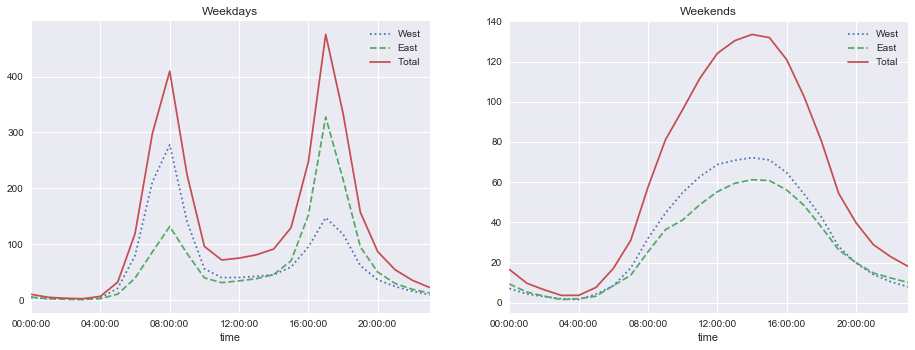

In [194]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax= ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

In [195]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.randint(0, 1000, (100, 3)))
                          for i in range(5))

In [204]:
result1 = -df1 * df2 / (df3 + df4) - df5

In [203]:
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')

In [205]:
np.allclose(result1, result2)

True

In [231]:
df = pd.DataFrame(rng.randint(0 , 300, (100,3) ), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,285,10,178
1,85,227,187
2,182,66,198
3,272,31,106
4,165,42,25


In [232]:
r1 = (df['A'] + df['B'] / (df['C'] - 1 ))

In [233]:
r2 = pd.eval('(df.A + df.B / (df.C - 1 ))')

In [234]:
np.allclose(r1, r2)

False

In [237]:
%timeit pd.eval('(df.A + df.B / (df.C- 1 ))')

197 ms ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [238]:
%timeit (df['A'] + df['B'] / (df['C'] - 1 ))

115 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
